In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score

In [2]:
data = pd.read_csv("../datasets/Crop_recommendation.csv")

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
unique_values = data['label'].unique()
print(unique_values)

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


## 01. EDA - Explorary Data Analysis

In [6]:
data.shape

(2200, 8)

In [7]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

In [10]:
int(data.duplicated().sum())

0

In [11]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [12]:
data.rename(columns={'N': 'Nitrogen', 'P': 'Phosphorus','K':'Potassium','label':'Crops'}, inplace=True)

In [13]:
data.head()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall,Crops
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
le

LabelEncoder()

In [17]:
data['Crops'] = le.fit_transform(data[['Crops']])

In [18]:
data.head()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall,Crops
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [19]:
unique_values = data['Crops'].unique()
print(unique_values)

[20 11  3  9 18 13 14  2 10 19  1 12  7 21 15  0 16 17  4  6  8  5]


In [20]:
x = data.drop('Crops',axis=1)

In [21]:
x

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [22]:
y = data[['Crops']]

In [23]:
y

,Crops
0,20
1,20
2,20
3,20
4,20
...,...
2195,5
2196,5
2197,5
2198,5


In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
def evaluation_of_classifier(
    clf: 'classifier',
    xtrain: np.typing.ArrayLike,
    ytrain: np.typing.ArrayLike,
    xtest: np.typing.ArrayLike,
    ytest: np.typing.ArrayLike,
    clf_name: str
):
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    print(f"Classification Report for {clf_name}:")
    print(classification_report(ytest, ypred))
    accuracy_val = accuracy_score(ytest, ypred)
    print(f'{clf_name} Validation Accuracy: {accuracy_val:.2%}')
    conf_matrix = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.show()

## 02. Classical Machine Learning Classifiers

### 2.1 Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logistic_r = LogisticRegression()

In [29]:
logistic_r

LogisticRegression()

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      1.00      0.98        21
           2       0.83      0.75      0.79        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.80      0.94      0.86        17
           7       1.00      1.00      1.00        14
           8       0.91      0.87      0.89        23
           9       1.00      0.95      0.97        20
          10       0.83      0.91      0.87        11
          11       0.94      0.76      0.84        21
          12       0.95      1.00      0.97        19
          13       0.85      0.92      0.88        24
          14       0.95      1.00      0.97        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00 

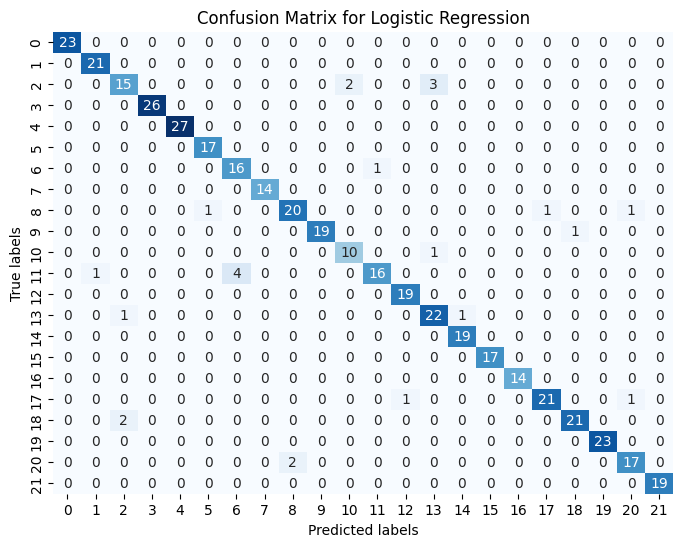

In [30]:
evaluation_of_classifier(logistic_r, xtrain, ytrain, xtest, ytest, "Logistic Regression")

### 2.2 Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

In [32]:
rf_classifier

RandomForestClassifier()

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1

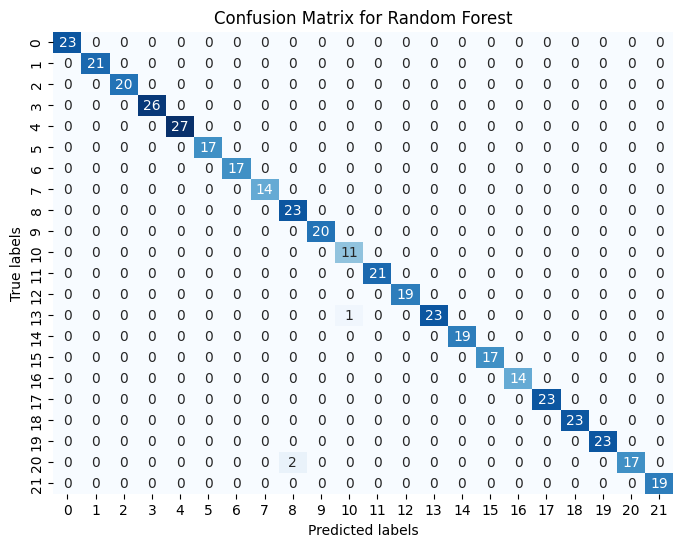

In [33]:
evaluation_of_classifier(rf_classifier, xtrain, ytrain, xtest, ytest, "Random Forest")

### 2.3 Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
decision_t = DecisionTreeClassifier()

In [38]:
decision_t

DecisionTreeClassifier()

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      0.96      0.94        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       0.95      1.00      0.97        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1

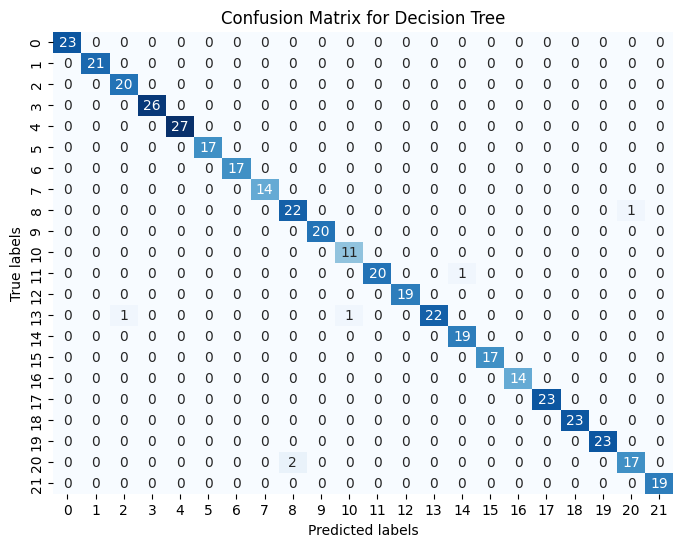

In [39]:
evaluation_of_classifier(decision_t, xtrain, ytrain, xtest, ytest, "Decision Tree")

### 3.4 Gradient Boosting Classifier

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
gradient_b = GradientBoostingClassifier()

In [43]:
gradient_b

GradientBoostingClassifier()

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      0.96      0.98        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.82      1.00      0.90        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00   

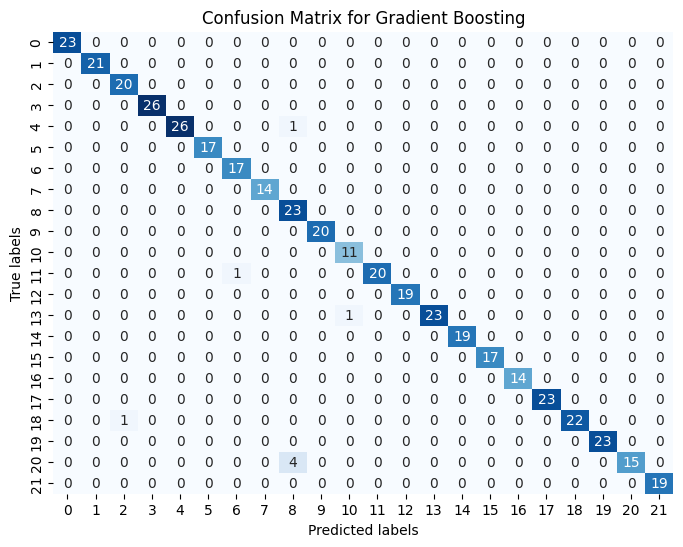

In [44]:
evaluation_of_classifier(gradient_b, xtrain, ytrain, xtest, ytest, "Gradient Boosting")

### 2.5 K-nearest Neighbors Classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
kneighbors = KNeighborsClassifier(n_neighbors= 5)

In [47]:
kneighbors

KNeighborsClassifier()

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      0.94      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.76      0.96      0.85        23
           9       0.95      1.00      0.98        20
          10       0.85      1.00      0.92        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00 

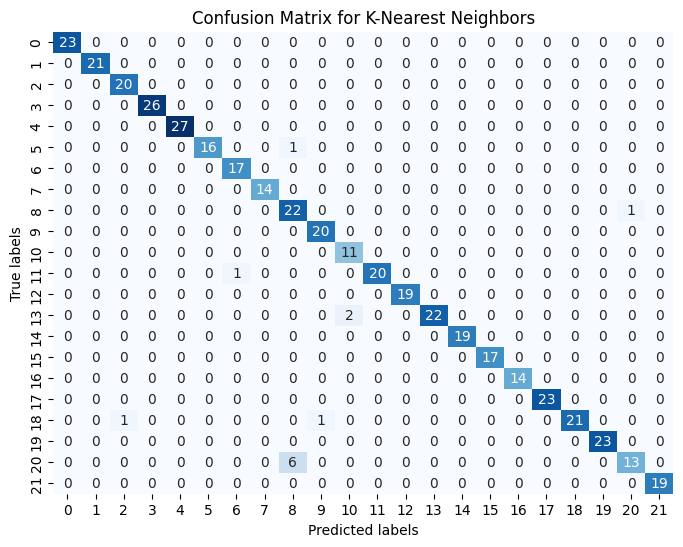

In [49]:
evaluation_of_classifier(kneighbors, xtrain, ytrain, xtest, ytest, "K-Nearest Neighbors")

### 2.6 Support Vector Machine Classifier

In [50]:
from sklearn.svm import SVC

In [51]:
svm = SVC()

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.91      1.00      0.95        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      0.94      0.97        17
           6       0.85      1.00      0.92        17
           7       1.00      1.00      1.00        14
           8       0.77      1.00      0.87        23
           9       0.95      1.00      0.98        20
          10       0.79      1.00      0.88        11
          11       1.00      0.86      0.92        21
          12       1.00      1.00      1.00        19
          13       1.00      0.88      0.93        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.

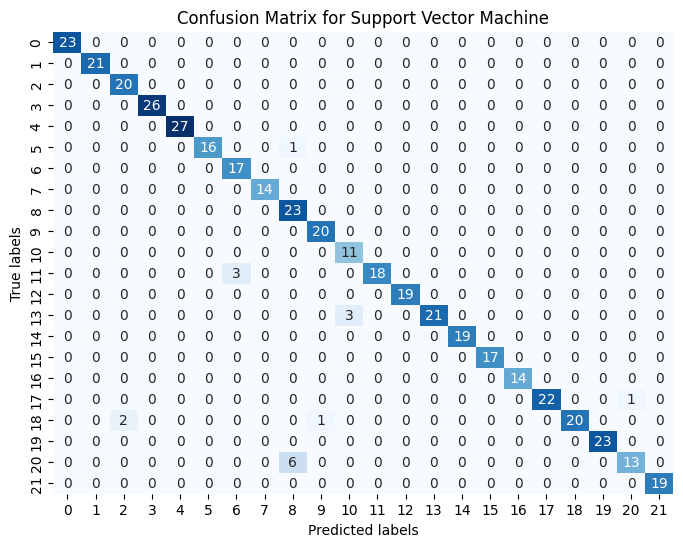

In [52]:
evaluation_of_classifier(svm, xtrain, ytrain, xtest, ytest, "Support Vector Machine")

### 2.7 Naive Bayes Classifier

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
gNb = GaussianNB()

In [56]:
gNb

GaussianNB()

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.0

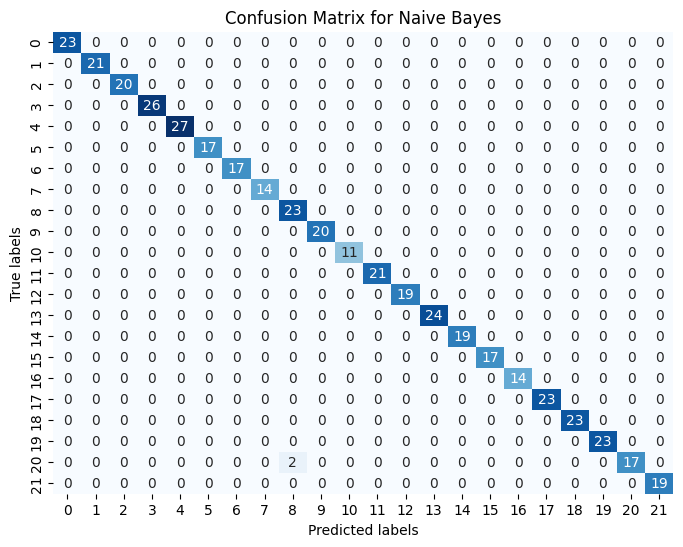

In [57]:
evaluation_of_classifier(gNb, xtrain, ytrain, xtest, ytest, "Naive Bayes")

## 03. Model Evaluation

In [59]:
def evaluate_classifier_metrics(clf, xtrain, ytrain, xtest, ytest, clf_name):
    clf.fit(xtrain, ytrain)
    y_pred = clf.predict(xtest)
    accuracy_val = accuracy_score(ytest, y_pred)
    report = classification_report(ytest, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    return {
        'Classifier': clf_name,
        'Accuracy': accuracy_val,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

In [60]:
models= {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

In [61]:
metrics_data = []

In [62]:
for clf_name, clf in models.items():
    metrics = evaluate_classifier_metrics(clf, xtrain, ytrain, xtest, ytest, clf_name)
    metrics_data.append(metrics)

In [63]:
metrics_df = pd.DataFrame(metrics_data)
plt.figure(figsize=(50, 10))
colors = sns.color_palette('viridis', 4)

<Figure size 5000x1000 with 0 Axes>

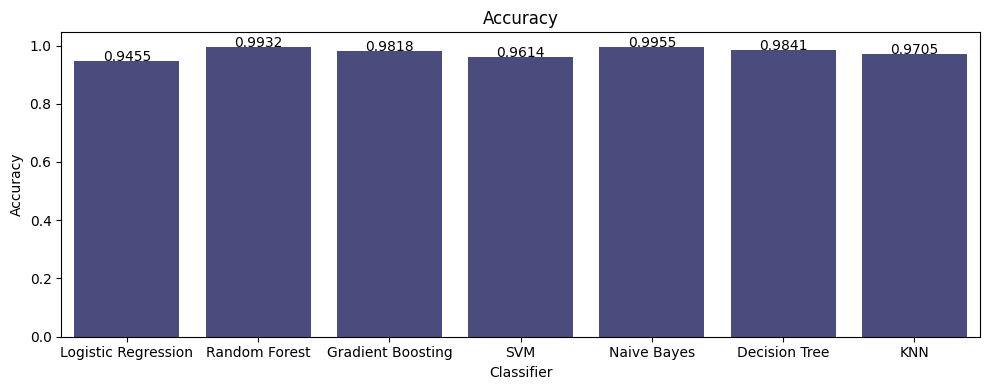

In [64]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 1, 1)
sns.barplot(x='Classifier', y='Accuracy', data=metrics_df, palette=[colors[0]])
plt.title('Accuracy')
for index, value in enumerate(metrics_df['Accuracy']):
    plt.text(index, value, f'{value:.4f}', ha='center')
plt.tight_layout()
plt.show()

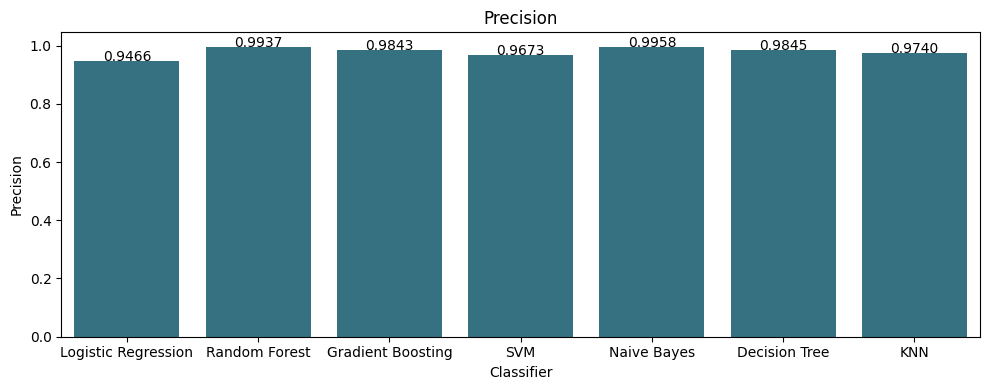

In [66]:
plt.figure(figsize=(10, 4))
plt.subplot(1,1,1)
sns.barplot(x='Classifier', y='Precision', data=metrics_df, palette=[colors[1]])
plt.title('Precision')
for index, value in enumerate(metrics_df['Precision']):
    plt.text(index, value, f'{value:.4f}', ha='center')
plt.tight_layout()
plt.show()

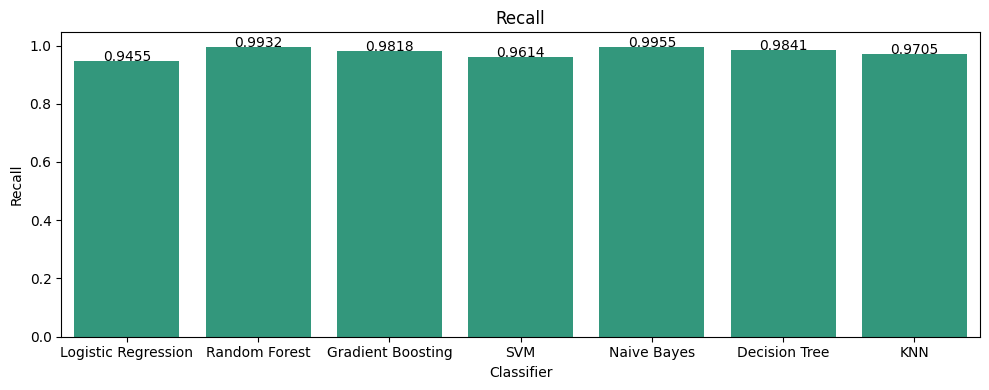

In [67]:
plt.figure(figsize=(10, 4))
plt.subplot(1,1,1)
sns.barplot(x='Classifier', y='Recall', data=metrics_df, palette=[colors[2]])
plt.title('Recall')
for index, value in enumerate(metrics_df['Recall']):
    plt.text(index, value, f'{value:.4f}', ha='center')
plt.tight_layout()
plt.show()

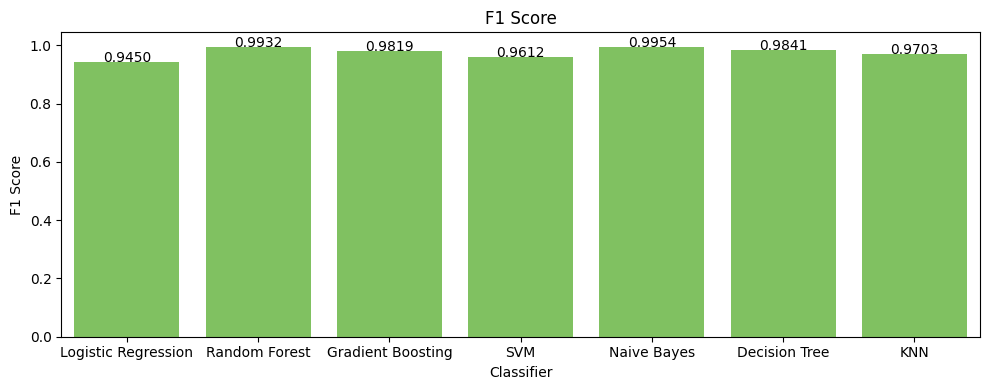

In [68]:
plt.figure(figsize=(10, 4))
plt.subplot(1,1,1)
sns.barplot(x='Classifier', y='F1 Score', data=metrics_df, palette=[colors[3]])
plt.title('F1 Score')
for index, value in enumerate(metrics_df['F1 Score']):
    plt.text(index, value, f'{value:.4f}', ha='center')

plt.tight_layout()
plt.show()

## 04. Evaluation for Training and Testing Accuracy for all model

In [70]:
def train_predict(model, xtrain, ytrain, xtest):
    model.fit(xtrain, ytrain)
    train_predictions = model.predict(xtrain)
    test_predictions = model.predict(xtest)
    train_accuracy = accuracy_score(ytrain, train_predictions)
    test_accuracy = accuracy_score(ytest, test_predictions)
    return train_accuracy, test_accuracy

In [71]:
def plot_accuracies(models, train_accuracies, test_accuracies):
    x = np.arange(len(models))
    width = 0.35

    fig, ax = plt.subplots(figsize=(15, 6))
    bars1 = ax.bar(x - width/2, train_accuracies, width, label='Train Accuracy', color='orange')
    bars2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy', color='lightgreen')

    ax.set_xlabel('Model')
    ax.set_ylabel('Accuracy')
    ax.set_title('Prediction Accuracy on Training and Test Data for Different Models')
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45)
    ax.legend()

    def autolabel(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.4f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(bars1)
    autolabel(bars2)
    plt.tight_layout()
    plt.show()

Logistic Regression: Train Accuracy = 0.9761, Test Accuracy = 0.9455
SVM: Train Accuracy = 0.9812, Test Accuracy = 0.9614
Random Forest: Train Accuracy = 1.0000, Test Accuracy = 0.9932
Gradient Boosting: Train Accuracy = 1.0000, Test Accuracy = 0.9818
KNN: Train Accuracy = 0.9898, Test Accuracy = 0.9705
Decision Tree: Train Accuracy = 1.0000, Test Accuracy = 0.9886
Gaussian Naive Bayes: Train Accuracy = 0.9949, Test Accuracy = 0.9955


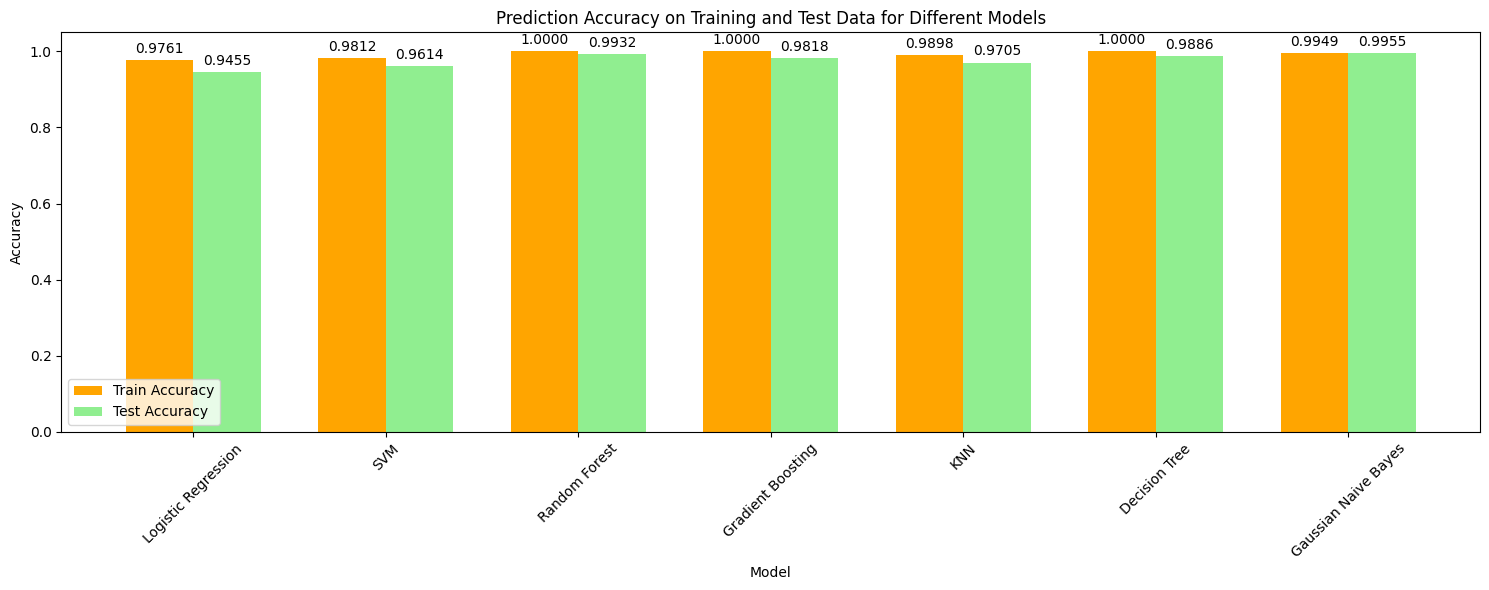

In [72]:
models = [
    ("Logistic Regression", LogisticRegression()),
    ("SVM", SVC()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Gaussian Naive Bayes", GaussianNB())
]

train_accuracies = []
test_accuracies = []
for model_name, model in models:
    train_accuracy, test_accuracy = train_predict(model, xtrain, ytrain, xtest)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    print(f"{model_name}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")
plot_accuracies([model_name for model_name, _ in models], train_accuracies, test_accuracies)


## 05. Models Persistence

### 5.1 Machine Learning Persistence

In [73]:
import pickle as pk

In [75]:
!ls ..

datasets  notebooks  papers  README.md


In [76]:
!mkdir ../models

In [85]:
models

[('Logistic Regression', LogisticRegression()),
 ('SVM', SVC()),
 ('Random Forest', RandomForestClassifier()),
 ('Gradient Boosting', GradientBoostingClassifier()),
 ('KNN', KNeighborsClassifier()),
 ('Decision Tree', DecisionTreeClassifier()),
 ('Gaussian Naive Bayes', GaussianNB())]

In [86]:
for model in models:
    with open(f"../models/{model[0]}.pkl", "wb") as f:
        pk.dump(model, f)

### 5.2 Label Encoding 

In [87]:
with open("../models/label_encoding.pkl", "wb") as f:
    pk.dump(
        ("Label Encoding", le), f
    )

In [89]:
le.classes_[20]

'rice'